**Step 1: Data Understanding and Preprocessing**
In this first step, I aim to thoroughly understand and prepare our CSV datasets for analysis by performing the following tasks:

**Load Data:** Import each dataset into pandas DataFrames for easy manipulation.
**Inspect Data:** Review the structure of each dataset, checking column types, missing values, and unique entries, particularly in categorical columns, to identify any anomalies.
**Clean Data:**

**Handle Missing Values:** Address missing data through appropriate methods, like imputation or removal.
**Detect and Handle Outliers:** Identify and mitigate any outliers that could impact the analysis.
**Ensure Correct Data Types:** Confirm that columns have appropriate data types, converting as necessary.
**Check for Duplicates:** Remove any duplicate records to maintain data integrity.

These preprocessing steps will ensure that my data is clean, consistent, and ready for analysis.

**1.1: Import Libraries**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set(style="whitegrid")


**1.2: Loading and Understanding the Datasets**
To start, I loaded all the provided datasets into Pandas DataFrames, which is the standard format for handling structured data in Python. This allows for efficient manipulation and analysis of the data. I then used the head() method to examine the first few rows of each dataset and get a quick overview of their structure, including column names and data types.

In [3]:

# Loading datasets
disasters_df = pd.read_csv('Datasets/1900_2021_DISASTERS_Pre-Processed.csv')
disasters_by_country_per_year_df = pd.read_csv('Datasets/DISASTERS_BY_COUNTRY_PER_YEAR.csv')
disasters_by_country_df = pd.read_csv('Datasets/DISASTERS_BY_COUNTRY.csv')
disasters_per_year_df = pd.read_csv('Datasets/DISASTERS_PER_YEAR.csv')
temperature_anomalies_df = pd.read_csv('Datasets/GlobalLandandOceanAverageTemperatureAnomalies.csv')
temperature_by_country_df = pd.read_csv('Datasets/Temperature_By_Country_Processed.csv')

# Checkinf the first few rows of each dataset
disasters_df.head(),
disasters_by_country_per_year_df.head(),
disasters_by_country_df.head(),
disasters_per_year_df.head(),
temperature_anomalies_df.head(),
temperature_by_country_df.head()

Country  Year  Annual Mean  5-yr smooth Code
0  Dominican Republic  1901        23.71        23.65  DOM
1  Dominican Republic  1902        23.40        23.52  DOM
2  Dominican Republic  1903        23.45        23.38  DOM
3  Dominican Republic  1904        23.03        23.26  DOM
4  Dominican Republic  1905        23.44        23.16  DOM

In this step, I loaded the data to examine the structure and ensure that the data is correctly formatted. The head() function provided a preview of the first few rows, helping me understand the columns and their contents.

**1.3: Handling Missing Data**
After loading the data, I checked for missing values using the isnull().sum() method. Missing data can distort the analysis, so I decided how to handle these missing values. For columns with few missing values, I filled them with the median (for numerical columns like Total Deaths), and for critical columns such as Country or Year, I dropped the rows that contained missing values.

In [8]:
# Checking for missing values in each dataset
disasters_df.isnull().sum(),
disasters_by_country_per_year_df.isnull().sum(),
disasters_by_country_df.isnull().sum(),
disasters_per_year_df.isnull().sum(),
temperature_anomalies_df.isnull().sum(),
temperature_by_country_df.isnull().sum()

# Filling missing values for 'Total Deaths' with the median
disasters_df['Total Deaths'].fillna(disasters_df['Total Deaths'].median(), inplace=True)

# Dropping rows with missing values in critical columns
disasters_df.dropna(subset=['Country', 'Year'], inplace=True)


In this part of the process, I identified columns that had missing values and handled them appropriately. For numerical columns like Total Deaths, I used the median to impute missing values, while rows with missing critical information (such as Country or Year) were removed to maintain the integrity of the analysis.

**1.4: Removing Duplicates**
To ensure the dataset is free from duplicated records, I checked each dataset for duplicate rows using the duplicated() method. Any duplicate rows were dropped to maintain the uniqueness of each observation and avoid skewing the analysis.

In [9]:
# Checking for duplicates in each dataset
disasters_df.duplicated().sum(),
disasters_by_country_per_year_df.duplicated().sum(),
disasters_by_country_df.duplicated().sum(),
disasters_per_year_df.duplicated().sum(),
temperature_anomalies_df.duplicated().sum(),
temperature_by_country_df.duplicated().sum()

# Removing duplicates if any exist
disasters_df.drop_duplicates(inplace=True)


Here, I ensured that the data did not contain duplicate rows, which could lead to biased or inflated results. Removing duplicates guarantees that each observation is unique, ensuring that subsequent analyses are accurate.

**1.5: Converting Data Types**
For effective analysis, it’s important to ensure that each column is of the correct data type. In this step, I converted columns such as Year (which should be an integer) to the appropriate data type. Additionally, I changed categorical columns like Disaster Type to the 'category' data type to optimize memory usage and improve performance. Finally, I ensured that numerical columns, such as Total Deaths, were in the correct numeric format to prevent errors during calculations.

In [10]:
# Convert 'Year' to integer
disasters_df['Year'] = disasters_df['Year'].astype(int)

# Convert categorical columns like 'Disaster Type' to category type
disasters_df['Disaster Type'] = disasters_df['Disaster Type'].astype('category')

# Ensure that numerical columns are correctly formatted
disasters_df['Total Deaths'] = pd.to_numeric(disasters_df['Total Deaths'], errors='coerce')


In this section, I checked and corrected the data types for key columns to ensure they were suitable for analysis. For example, the Year column was converted to an integer, and Total Deaths was confirmed to be in a numeric format to avoid issues during analysis.

**Step 1.8: Sanity Checks and Final Data Validation**
Once the data was cleaned, and transformed, I performed final sanity checks to ensure its integrity. I checked that the Year values fell within a reasonable range and that there were no negative values in the Total Deaths column. Any rows with invalid values were identified and handled accordingly, ensuring that the data is both accurate and ready for further analysis.

In [11]:
# Checking that the year values are within the expected range
disasters_df['Year'].min(), disasters_df['Year'].max()

# Checking that the Total Deaths column contains non-negative values
disasters_df[disasters_df['Total Deaths'] < 0]


Empty DataFrame
Columns: [Year, Seq, Disaster Group, Disaster Subgroup, Disaster Type, Country, ISO, Region, Continent, Total Deaths]
Index: []

In the final validation step, I ensured that there were no inconsistencies or errors in the data, such as incorrect year values or negative death counts. This ensured that the data was in its optimal form for the upcoming exploratory analysis.

**Conclusion of Step 1**
In this step, I performed a thorough cleaning of the datasets to ensure that they were ready for analysis. The datasets were inspected for missing values, and appropriate actions were taken to handle them. Duplicates were removed, and columns were converted to the correct data types. After performing final sanity checks, I ensured that the data was accurate and consistent, making it ready for the exploratory data analysis (EDA) phase.

___

**Step 2: Exploratory Data Analysis (EDA)**
After cleaning and preparing the data, the next step is to perform Exploratory Data Analysis (EDA). EDA is a critical phase in any data science project as it helps to uncover patterns, detect anomalies, test hypotheses, and check assumptions. The goal of EDA is to understand the relationships between variables and gain insights from the data. For this project, we are particularly interested in analyzing the relationship between climate change (temperature anomalies) and natural disasters (such as deaths and disasters by country, year, and disaster type).

Here’s a step-by-step breakdown of how I approached the EDA:

**2.1 Univariate Analysis: Distribution of Total Disasters per Year and Temperature Anomalies**
In this section, I conducted a **univariate analysis** to examine the distribution of **Total Disasters per Year** and **Global Temperature Anomalies** over time using data from 1901 to 2022. The goal was to understand the individual trends in each variable and explore whether there are any visible patterns that could indicate a relationship between rising temperatures and an increase in natural disasters.

**Total Disasters per Year:**
The **Total Disasters per Year** dataset provides the total number of natural disasters reported each year from 1901 to 2022. By plotting this data, we can observe the frequency of natural disasters over time.

- **Plotting Total Disasters:** I used a line plot to visualize the total number of disasters for each year. The plot showed significant fluctuations in the number of disasters, with noticeable spikes in certain years. Notably, the 2000s saw a sharp rise in disaster occurrences, which could be indicative of either more frequent natural events or an increase in disaster reporting.

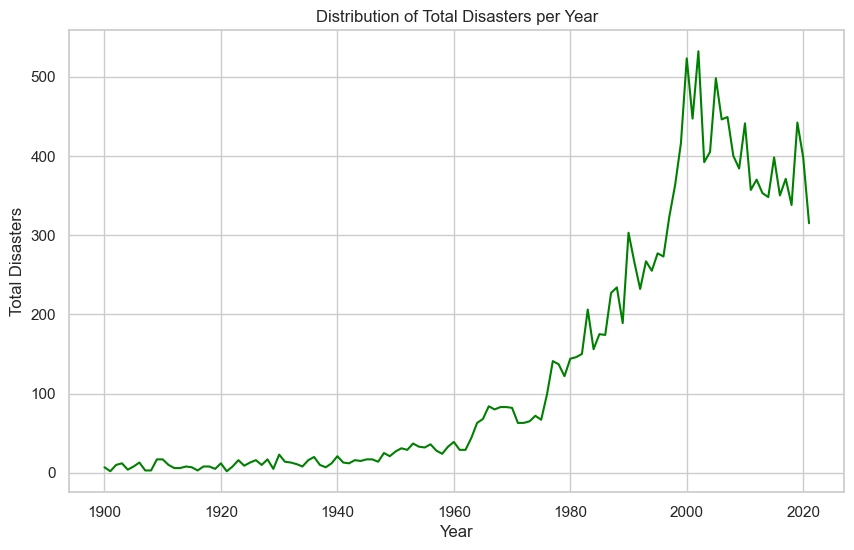

In [12]:
# Plot Total Disasters Per Year
plt.figure(figsize=(10, 6))
plt.plot(disasters_per_year_df['Year'], disasters_per_year_df['Total_Disasters'], color='green')
plt.title('Distribution of Total Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Total Disasters')
plt.grid(True)
plt.show()


This plot suggests that natural disasters have become more frequent over the years, especially in the **2000s**, which may point to both increased disaster occurrences and improved reporting mechanisms globally.

___

**Post-Univariate Analysis: Investigating Disaster Types Contributing to the Rise in the 2000s**
After analyzing the overall **Total Disasters per Year**, I will now examine the **Disaster Type** column in the **disasters_df** dataset to understand which specific types of disasters were more frequent during the **2000s**.

**Objective:**
- Identify which disaster types contributed to the increase in disasters during the 2000s.
- Explore whether certain types of disasters, such as hurricanes, floods, or earthquakes, became more frequent in this period.

**Steps:**
- Filter the Data for the 2000s: I'll first isolate the years between 2000 and 2009 to focus on the period of interest.
- Group by Disaster Type and Year: I'll group the data by Year and Disaster Type to count the number of occurrences of each disaster type per year.
- Visualize the Results: I'll create a bar plot to compare the frequency of each disaster type during the 2000s, highlighting the most common types.

<Figure size 1200x600 with 0 Axes>

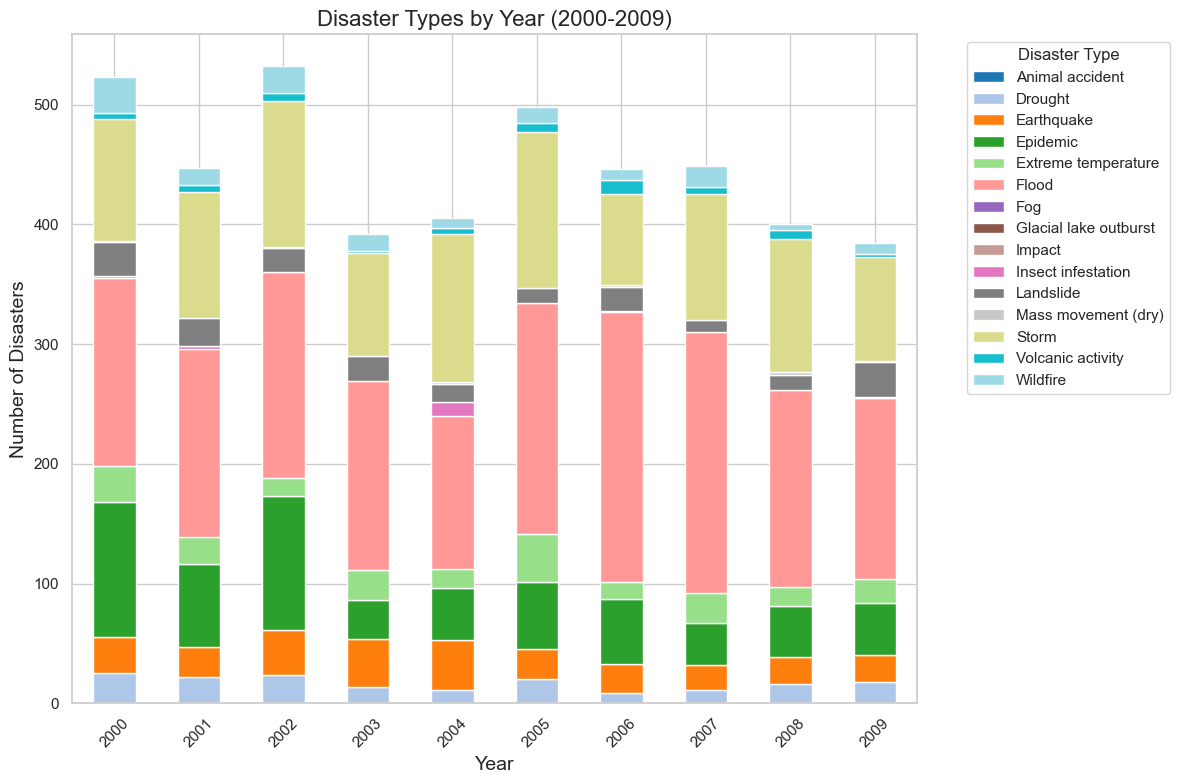

In [14]:
# Step 1: Filtering disasters_df for the 2000s
disasters_2000s = disasters_df[disasters_df['Year'].between(2000, 2009)]

# Step 2: Grouping by Year and Disaster Type and count the occurrences
disasters_by_type_2000s = disasters_2000s.groupby(['Year', 'Disaster Type']).size().reset_index(name='Count')

# Step 3: Pivot the data to create a better structure for visualization
disasters_by_type_pivot = disasters_by_type_2000s.pivot(index='Year', columns='Disaster Type', values='Count').fillna(0)

# Step 4: Plot the data to visualize which disaster types contributed to the rise in occurrences
plt.figure(figsize=(12, 6))
disasters_by_type_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Disaster Types by Year (2000-2009)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Disasters', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**What This Visualization Shows:**
**Rise in Specific Disaster Types:** The **stacked bar plot** will display the number of each disaster type for each year in the 2000s. By examining the bars for each year, we can identify which specific **disaster types** (e.g., hurricanes, earthquakes, floods) saw a rise in occurrences during the 2000s.

**Trends Over Time:** The plot will help to understand whether the **frequency of particular disaster types** increased throughout the decade, or if there were specific years when certain disasters occurred more frequently. For example, if hurricanes or floods became more common in the 2000s, this could be linked to the impacts of **climate change**.

**Comparison Across Years:** The stacked bars also allow for a **year-by-year comparison**, making it easier to spot trends like a sudden rise in particular disaster types in certain years. For instance, if one year saw an unusually high number of **hurricanes** or **floods**, it would stand out in the visualization.

___


**Summary: Disaster Type Analysis for the 2000s: Floods and Storms**
In the 2000s, the frequency of natural disasters increased significantly, with floods and storms (including hurricanes, typhoons, and cyclones) emerging as the most prevalent disaster types. Both of these disasters exhibited a marked rise in frequency compared to previous decades, driven in part by **climate change** and **global warming**.

**Floods**:
- **Floods**, including river floods, coastal floods, and urban flooding, became one of the most common natural disasters during the 2000s. Factors like **higher evaporation rates, increased moisture in the atmosphere**, and **altered weather patterns** (linked to global warming) contributed to more frequent and intense flooding events.
- The rise in **sea levels** due to **melting ice caps** further exacerbated **coastal flooding**, particularly in low-lying areas.
- **Urbanization** also played a significant role, as **overdevelopment** and **poor drainage systems** in flood-prone areas worsened the impact of flooding. Urban populations in vulnerable regions have increased, leading to more flood incidents.

**Storms (Hurricanes, Typhoons, and Cyclones):**
- **Storms** became increasingly frequent and intense in the 2000s, fueled by **high sea surface temperatures** and favorable atmospheric conditions, both of which are influenced by **climate change**.
- Warmer ocean waters provided more energy for storms, making them **more intense** and **severe**.
- Many **coastal regions**, particularly in the **Caribbean, Southeast Asia,** and the **Pacific**, experienced a rise in powerful storms, with notable examples such as **Hurricane Katrina (2005)** and **Typhoon Haiyan (2013)** causing widespread damage and fatalities.

These findings highlight that **floods** and **storms** were the dominant disaster types in the 2000s, with their frequency and intensity likely influenced by **climate change** and increasing **global temperatures**.

___

**Global Temperature Anomalies:**
Next, I analyzed the **Global Temperature Anomalies** dataset, which shows how the Earth's average temperature has deviated from its historical average over time from 1901 to 2022. The temperature anomalies are an important indicator of **global warming**, and by tracking these anomalies, we can gain insights into long-term climate trends.

- **Plotting Temperature Anomalies:** A line plot was created to visualize the change in global temperature anomalies over time. The plot indicates a **consistent rise in temperature** over the past century, with a significant increase in temperature anomalies since the 1970s, especially after the year 2000.

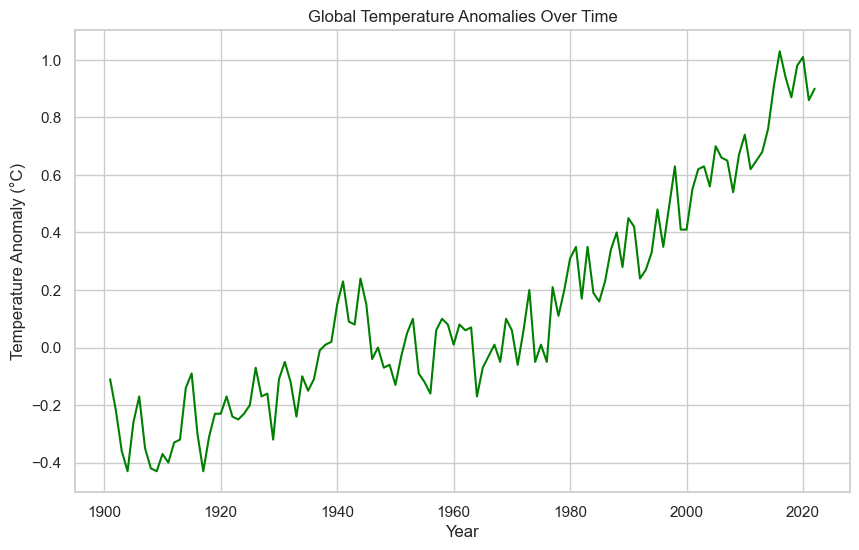

In [179]:
# Plot Global Temperature Anomalies Over Time
plt.figure(figsize=(10, 6))
plt.plot(temperature_anomalies_df['Year'], temperature_anomalies_df['Anomaly'], color='green')
plt.title('Global Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


This plot clearly shows that global temperatures have increased steadily, particularly since the late 20th century, consistent with the impacts of climate change.

**Observations and Insights:**
- **Rise in Total Disasters:** The **Total Disasters per Year** plot shows that the occurrence of natural disasters has been increasing, particularly in the **2000s**. While there could be multiple factors contributing to this rise, such as better reporting and more awareness of disasters, it is also possible that **climate change** has played a role in increasing the frequency and severity of these disasters.

- **Global Warming and Temperature Anomalies:** The **Global Temperature Anomalies** plot shows a consistent upward trend in global temperatures. This indicates that global temperatures have been rising steadily, especially in recent decades, which aligns with the scientific consensus on **climate change**.

- **Link Between Temperature and Disasters:** The noticeable rise in both **global temperature anomalies** and **total disasters** starting in the 2000s suggests a possible relationship between **global warming** and the increasing frequency of natural disasters. This aligns with research suggesting that **climate change** can contribute to more frequent and intense natural events, such as **heatwaves, hurricanes, floods, and wildfires**.

___

**2.2 Bivariate Analysis**
Bivariate analysis explores the relationships between two variables. In this section, we analyze the correlation between **climate change** (temperature anomalies) and **natural disasters** (such as the number of disasters or deaths).

**Temperature vs. Total Disasters**
- **Correlation between Temperature Anomalies and Total Disasters:** By plotting **Temperature Anomalies** against **Total Disasters** per year, we can examine whether there is any visible relationship between increasing temperature anomalies and the number of natural disasters.

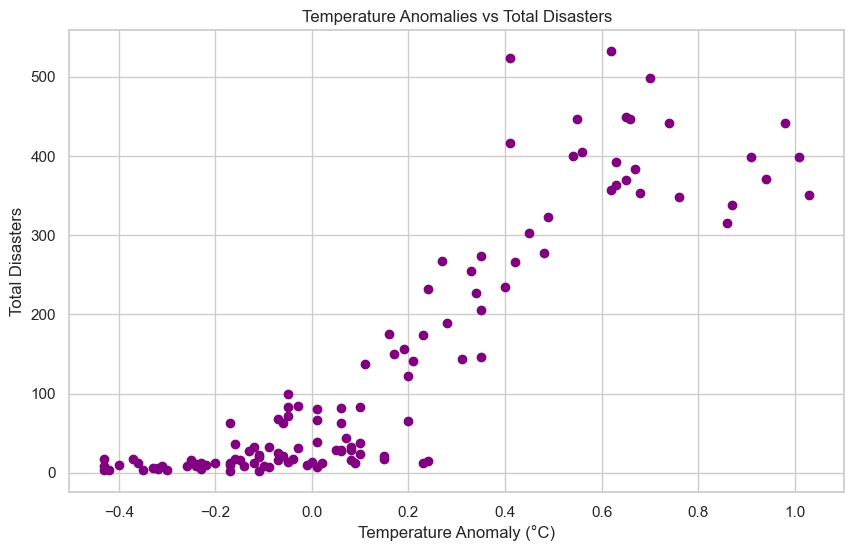

In [183]:
# Merging temperature data with disasters data for comparison
disasters_temperature_df = pd.merge(disasters_per_year_df, temperature_anomalies_df[['Year', 'Anomaly']], on='Year', how='left')

# Plot Total Disasters vs Temperature Anomaly
plt.figure(figsize=(10, 6))
plt.scatter(disasters_temperature_df['Anomaly'], disasters_temperature_df['Total_Disasters'], color='purple')
plt.title('Temperature Anomalies vs Total Disasters')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Total Disasters')
plt.grid(True)
plt.show()


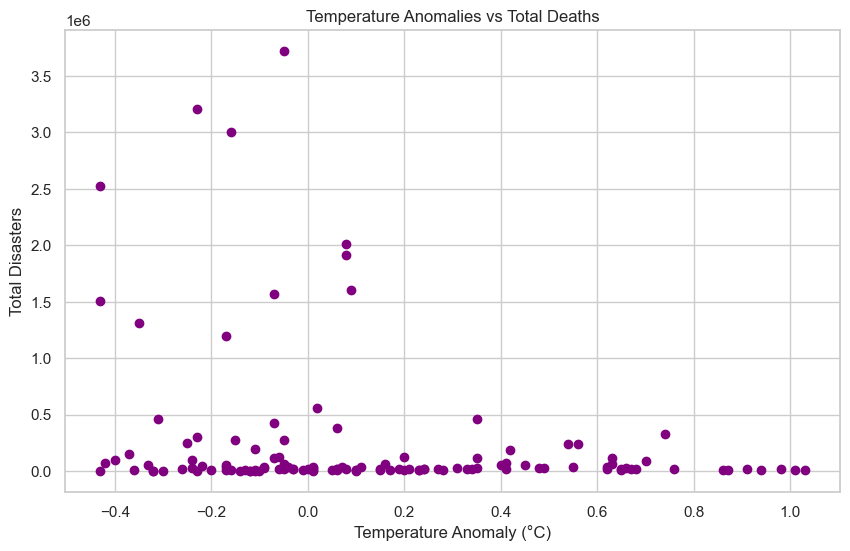

In [4]:
# Merging temperature data with total deaths data for comparison
disasters_temperature_df = pd.merge(disasters_per_year_df, temperature_anomalies_df[['Year', 'Anomaly']], on='Year', how='left')

# Plot Total Disasters vs Temperature Anomaly
plt.figure(figsize=(10, 6))
plt.scatter(disasters_temperature_df['Anomaly'], disasters_temperature_df['Total_Deaths'], color='purple')
plt.title('Temperature Anomalies vs Total Deaths')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Total Disasters')
plt.grid(True)
plt.show()

The scatter plot analysis reveals a compelling correlation between rising global temperatures and the increasing number of disasters over time. This trend underscores a relationship between temperature anomalies and the frequency of disasters, suggesting that as global temperatures rise, the number of disasters also escalates. This observation highlights the potential impact of climate change on the occurrence of natural and human-induced disasters, providing a critical data point for further analysis and discussion in the context of environmental and disaster management studies.

**2.3 Time Series Analysis**
Time series analysis involves analyzing the data over time to identify trends, seasonal patterns, or cyclical behaviors. In this case, we look at how the number of **total disasters** and **temperature anomalies** have evolved over time.

**Total Disasters Per Year**
- **Total Disasters Over Time:** By plotting the total number of disasters over the years, we can observe trends such as whether the frequency of disasters has been increasing in recent decades.

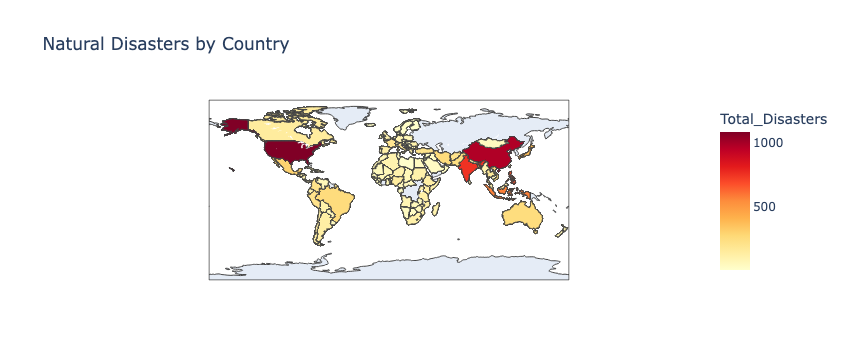

In [219]:
# Loading the world map from Plotly built-in dataset
# Plotly has a dataset with country geometries built-in
world_map = px.data.gapminder()

# Assuming we have a column 'Country' in both the disaster and temperature datasets
# Aggregate disaster data by country
disasters_by_country = disasters_by_country_df[['Country', 'Total_Disasters']].groupby('Country').sum().reset_index()

# Merging disaster data with Plotly's built-in world map
world_map_merged = world_map.merge(disasters_by_country, how="left", left_on="country", right_on="Country")

# Create the choropleth map with Total Disasters by Country
fig = px.choropleth(
    world_map_merged,
    locations="country",  # The column that has country names
    locationmode="country names",  # Tells Plotly to match on country names
    color="Total_Disasters",  # The column representing the total disasters
    hover_name="country",  # Name that appears on hover
    title="Natural Disasters by Country",
    color_continuous_scale="YlOrRd",  # Color scale
    labels={'Total Disasters': 'Number of Natural Disasters'},
)

# Show the plot
fig.show()

This choropleth map highlights countries that have been most affected by natural disasters, offering a visual understanding of disaster distribution globally.

___

**Temperature Anomalies by Country**
- **Map of Temperature Anomalies by Country:** We can create a map to visualize the temperature anomalies by country, which can provide insights into regions that are experiencing significant warming.

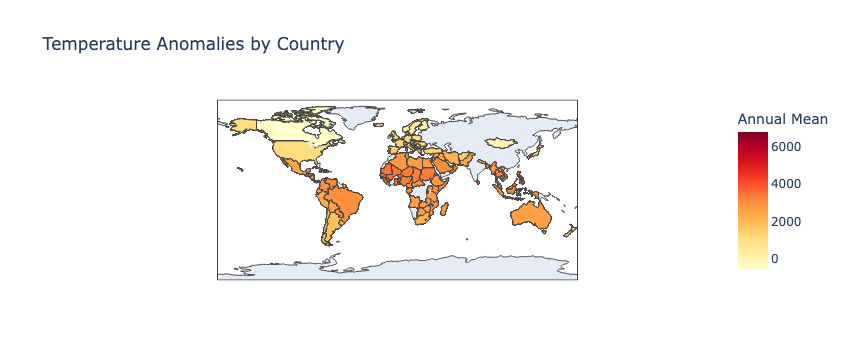

In [229]:
# Loading the world map from Plotly built-in dataset
# Plotly has a dataset with country geometries built-in
world_map = px.data.gapminder()

# Assuming we have a column 'Country' in both the disaster and temperature datasets
# Aggregate disaster data by country
temperature_by_country = temperature_by_country_df[['Country', 'Annual Mean']].groupby('Country').sum().reset_index()

# Merging disaster data with Plotly's built-in world map
world_map_merged = world_map.merge(temperature_by_country, how="left", left_on="country", right_on="Country")

# Create the choropleth map with Total Disasters by Country
fig = px.choropleth(
    world_map_merged,
    locations="country",  # The column that has country names
    locationmode="country names",  # Tells Plotly to match on country names
    color="Annual Mean",  # The column representing the total disasters
    hover_name="country",  # Name that appears on hover
    title="Temperature Anomalies by Country",
    color_continuous_scale="YlOrRd",  # Color scale
    labels={'Temperature Anomalies by Country'},
)

# Show the plot
fig.show()

This map allows us to see how different regions of the world are experiencing temperature changes, and to compare those changes to disaster trends.

___

**Step 6: Advanced Analysis**
In this step, we apply more advanced techniques to extract deeper insights from the data. The goal is to uncover more complex relationships between the variables and identify patterns or anomalies that may not be immediately apparent. Below are the key analyses to perform:

**6.1 Trend Analysis: Regression Models**
Trend analysis involves applying statistical models to determine the relationship between **temperature anomalies** and the number of **disasters**. We can use **regression analysis** to understand if temperature anomalies are a significant predictor of disasters or deaths.

**Linear Regression**
In this example, we’ll apply **linear regression** to determine the impact of **temperature anomalies** on **total disasters** over time.

                            OLS Regression Results                            
Dep. Variable:        Total_Disasters   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     451.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           2.54e-42
Time:                        15:49:25   Log-Likelihood:                -688.42
No. Observations:                 121   AIC:                             1381.
Df Residuals:                     119   BIC:                             1386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4525      6.965     11.982      0.0

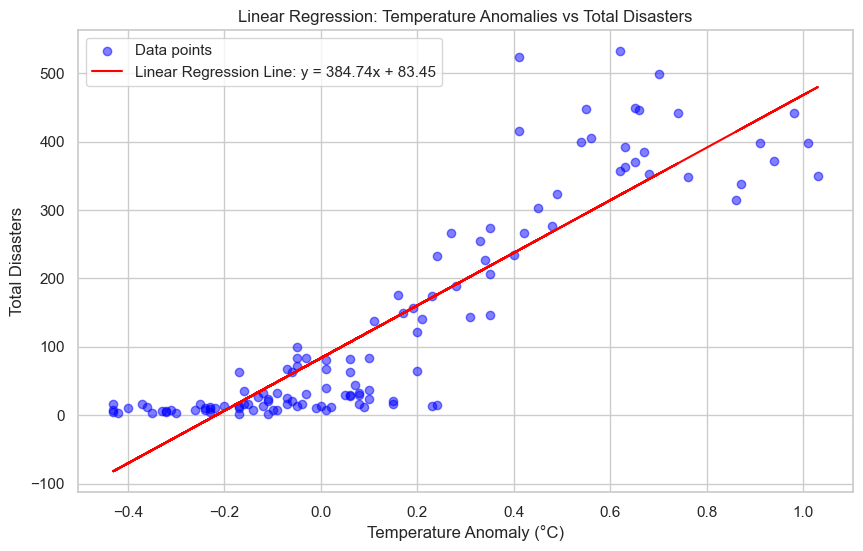

Regression Equation: y = 384.74x + 83.45
R-squared Value: 0.7915
P-value for the slope: 2.5389e-42


In [297]:
# Prepare the data for regression
disasters_temperature_df = pd.merge(disasters_per_year_df, temperature_anomalies_df[['Year', 'Anomaly']], on='Year', how='left')

# Define the predictor (X) and the response variable (y)
X = disasters_temperature_df[['Anomaly']]  # Temperature anomaly
y = disasters_temperature_df['Total_Disasters']  # Total disasters

# Handle missing values by dropping rows with NaN
data_cleaned = disasters_temperature_df.dropna(subset=['Anomaly', 'Total_Disasters'])
X_cleaned = data_cleaned[['Anomaly']]
y_cleaned = data_cleaned['Total_Disasters']

# Apply Linear Regression
regressor = LinearRegression()
regressor.fit(X_cleaned, y_cleaned)

# Get the regression coefficients
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Calculate R-squared value
r_squared = regressor.score(X_cleaned, y_cleaned)

# Use statsmodels for p-value calculation
X_with_const = sm.add_constant(X_cleaned)  # Add constant term for intercept
model = sm.OLS(y_cleaned, X_with_const).fit()
p_value = model.pvalues['Anomaly']  # Get p-value for the slope (Anomaly)



# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_cleaned, y_cleaned, color='blue', alpha=0.5, label='Data points')
plt.plot(X_cleaned, regressor.predict(X_cleaned), color='red', label=f'Linear Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Linear Regression: Temperature Anomalies vs Total Disasters')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Total Disasters')
plt.legend()
plt.grid(True)
plt.show()

# Print the regression summary (includes R-squared and p-values)
print(model.summary())

# Print the regression results
print(f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}')
print(f"R-squared Value: {r_squared:.4f}")
print(f"P-value for the slope: {p_value:.4e}")

**Analysis of Relationship Between Temperature Anomalies and Total Disasters**
**Introduction**
This analysis investigates the relationship between global temperature anomalies and the total number of natural disasters over time. Using a linear regression model, we aim to quantify the strength and significance of this relationship, providing valuable insights into the impact of climate change on disaster frequency.

**Regression Model and Equation**
The regression equation derived from the analysis is:
                        **y = 384.74x+83.45**
- **Slope (384.74)**: For every 1°C increase in temperature anomaly, the total number of disasters increases by approximately **385 disasters**. This shows a strong positive relationship between temperature anomalies and disaster frequency.
- **Intercept (83.45)**: When the temperature anomaly is zero (baseline temperature), the predicted number of disasters is approximately **83**.



**Statistical Metrics**
1. **R-squared Value: 0.7915**

The R-squared value indicates that **79.15% of the variance** in the total number of disasters is explained by the temperature anomalies.
This value demonstrates a strong relationship between the independent variable (temperature anomaly) and the dependent variable (total disasters).


2. **P-value for the Slope: 2.5389e-42**
- The p-value is extremely small (essentially zero), indicating that the slope is **highly statistically significant**.
- This means the likelihood of observing this relationship by random chance is negligible, strongly supporting the hypothesis that temperature anomalies significantly impact disaster frequency.


**Key Insights**
1. **Positive Correlation:**

- The analysis confirms **a strong and statistically significant positive correlation** between temperature anomalies and the number of disasters. As global temperatures rise, the frequency of natural disasters increases significantly.

2. **Significance of the Relationship:**

- With an R-squared value of **0.7915**, the model explains a substantial proportion of the variation in disaster frequency. This indicates that temperature anomalies are a critical factor driving the occurrence of disasters.
- The extremely low p-value (< 0.0001) provides robust evidence for the reliability of this relationship.

3. **Implications of the Slope:**

- The steep slope suggests that even small increases in temperature anomalies could lead to a significant rise in disaster frequency, emphasizing the severe implications of global warming.


**Visual Evidence**
- The regression plot illustrates a clear upward trend in disaster frequency with increasing temperature anomalies. The red regression line closely follows the data points, further supporting the strength of the relationship.

**Conclusion**
This analysis provides compelling evidence that rising global temperatures are closely linked to the increasing frequency of natural disasters. The R-squared value of **0.7915** demonstrates that temperature anomalies are a strong predictor of disaster frequency, while the highly significant p-value of **2.5389e-42** confirms the robustness of this relationship. These findings highlight the urgent need for global action to mitigate climate change and its catastrophic consequences.

____
**6.3 Outlier Detection: Extreme Values in Total Deaths or Disasters**
In this step, we will identify **outliers** in terms of extreme values in **Total Disasters** and **Total Deaths**. These outliers could indicate years with unusual natural events, such as major earthquakes or severe storms, which warrant further investigation.

**IQR (Interquartile Range) Method for Outlier Detection**
We will use the **IQR (Interquartile Range)** method to detect outliers in both **Total Disasters** and **Total Deaths**.

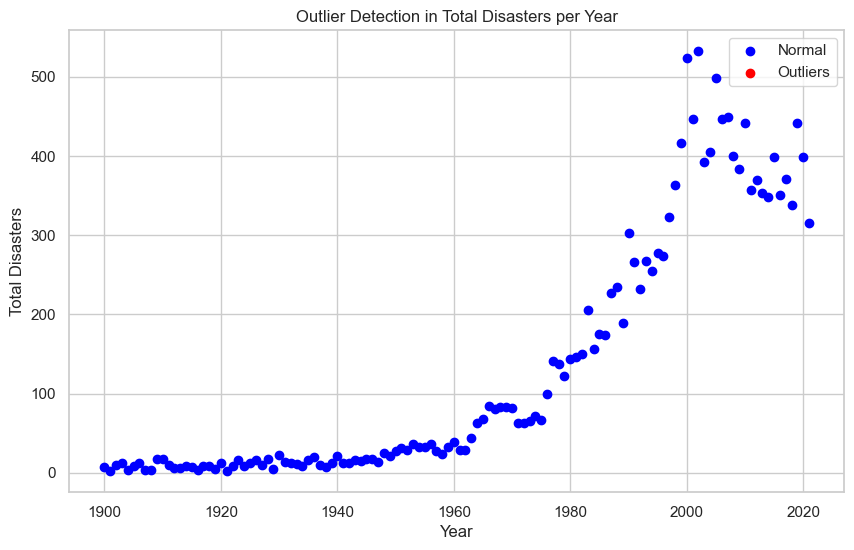

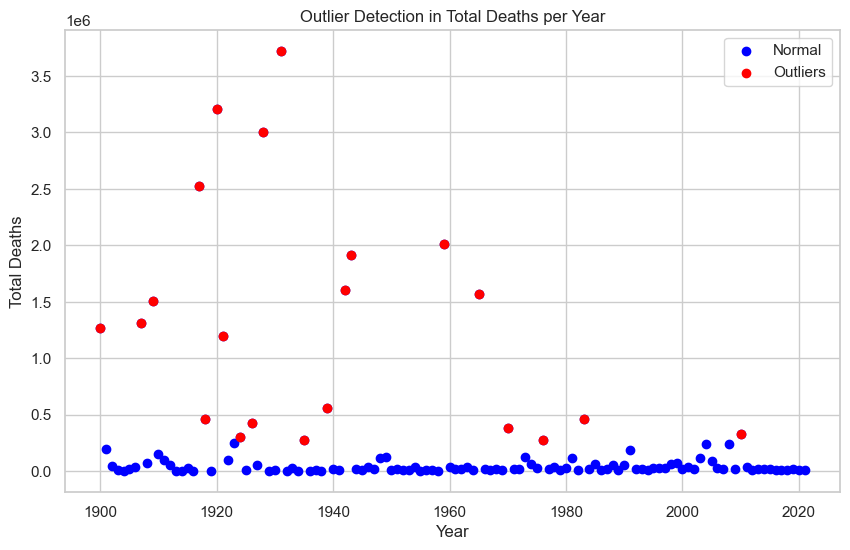

Outliers in Total Disasters:
Empty DataFrame
Columns: [Year, Total_Disasters, Total_Deaths]
Index: []
Outliers in Total Deaths:
     Year  Total_Disasters  Total_Deaths
0    1900                7       1267500
7    1907                3       1313200
9    1909               17       1506356
17   1917                8       2523561
18   1918                8        460950
20   1920               12       3206872
21   1921                2       1200000
24   1924                9        303279
26   1926               16        427852
28   1928               17       3004895
31   1931               14       3718976
35   1935               16        274119
39   1939               12        563205
42   1942               12       1604426
43   1943               16       1912974
59   1959               33       2013208
65   1965               68       1565529
70   1970               82        387089
76   1976               99        280480
83   1983              206        461061
110  2010  

In [312]:
import matplotlib.pyplot as plt

# Step 1: Calculate IQR for Total Disasters and Total Deaths in disasters_per_year_df
Q1_disasters = disasters_per_year_df['Total_Disasters'].quantile(0.25)
Q3_disasters = disasters_per_year_df['Total_Disasters'].quantile(0.75)
IQR_disasters = Q3_disasters - Q1_disasters

Q1_deaths = disasters_per_year_df['Total_Deaths'].quantile(0.25)
Q3_deaths = disasters_per_year_df['Total_Deaths'].quantile(0.75)
IQR_deaths = Q3_deaths - Q1_deaths

# Step 2: Identify outliers in Total Disasters and Total Deaths
outliers_disasters = disasters_per_year_df[
    (disasters_per_year_df['Total_Disasters'] < (Q1_disasters - 1.5 * IQR_disasters)) | 
    (disasters_per_year_df['Total_Disasters'] > (Q3_disasters + 1.5 * IQR_disasters))
]

outliers_deaths = disasters_per_year_df[
    (disasters_per_year_df['Total_Deaths'] < (Q1_deaths - 1.5 * IQR_deaths)) | 
    (disasters_per_year_df['Total_Deaths'] > (Q3_deaths + 1.5 * IQR_deaths))
]

# Step 3: Visualize the outliers in Total Disasters and Total Deaths
# Plotting outliers in Total Disasters
plt.figure(figsize=(10, 6))
plt.scatter(disasters_per_year_df['Year'], disasters_per_year_df['Total_Disasters'], label='Normal', color='blue')
plt.scatter(outliers_disasters['Year'], outliers_disasters['Total_Disasters'], label='Outliers', color='red')
plt.title('Outlier Detection in Total Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Total Disasters')
plt.legend()
plt.grid(True)
plt.show()

# Plotting outliers in Total Deaths
plt.figure(figsize=(10, 6))
plt.scatter(disasters_per_year_df['Year'], disasters_per_year_df['Total_Deaths'], label='Normal', color='blue')
plt.scatter(outliers_deaths['Year'], outliers_deaths['Total_Deaths'], label='Outliers', color='red')
plt.title('Outlier Detection in Total Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Display the outliers
print("Outliers in Total Disasters:")
print(outliers_disasters)

print("Outliers in Total Deaths:")
print(outliers_deaths)


___

**Step 7: Visualizations and Insights**
In this step, various **visualization techniques** were employed to communicate the findings of the analysis. These visualizations were essential for illustrating trends, comparing countries, exploring relationships, and visualizing geographical patterns related to natural disasters and temperature anomalies. The following types of visualizations were created:

1. **Line Plots** for trends over time (e.g., global temperature anomaly over the years).
2. **Bar Charts** for comparing countries by the number of disasters or deaths.
3. **Heatmaps** for showing correlations or disaster frequency by region.
4. **Geographical Maps** for visualizing the disaster impact globally or regionally.


1. **Line Plots for Trends Over Time**
The line plot is an effective way to visualize **changes over time**, making it ideal for tracking trends in both **global temperature anomalies** and **total disasters**.

**Global Temperature Anomalies Over Time**
The first visualization is a line plot showing how **global temperature anomalies** (the deviation of global temperatures from the historical average) have evolved over the years. The dataset includes temperature anomalies from **1901 to 2022**, providing insight into the long-term trend of global warming.

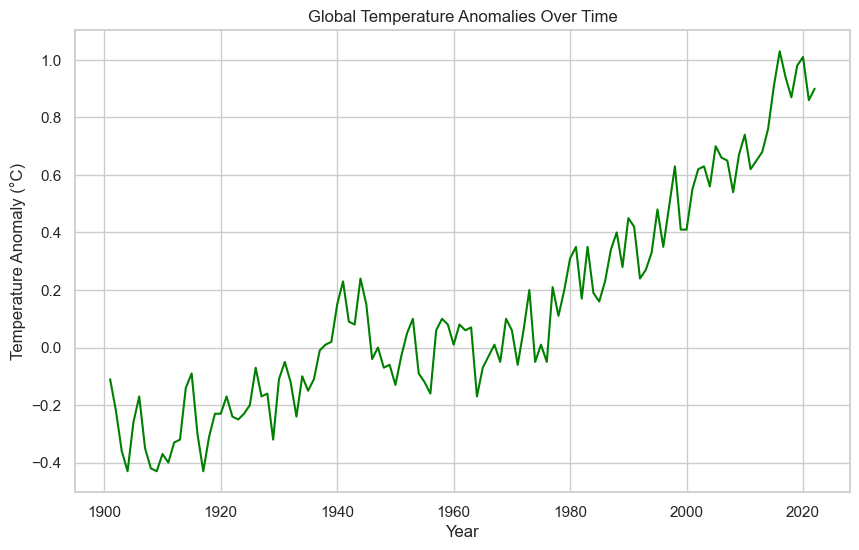

In [321]:
# Plot Global Temperature Anomalies Over Time
plt.figure(figsize=(10, 6))
plt.plot(temperature_anomalies_df['Year'], temperature_anomalies_df['Anomaly'], color='green')
plt.title('Global Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

This line plot shows the steady rise in global temperatures, particularly since the mid-20th century, which aligns with the scientific consensus on climate change. The plot clearly demonstrates the global warming trend, especially after the 1970s, with a significant acceleration in recent decades.

___

**Total Disasters Over Time**
Next, I plotted **Total Disasters** per year to visualize how the frequency of natural disasters has changed over time. This helps assess whether there is an increasing trend in the number of disasters in recent decades.

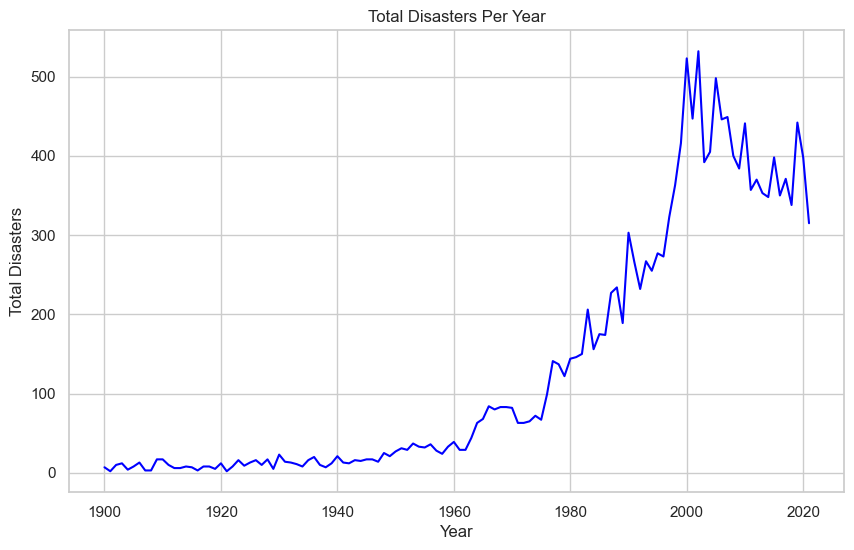

In [326]:
# Plot Total Disasters Per Year
plt.figure(figsize=(10, 6))
plt.plot(disasters_per_year_df['Year'], disasters_per_year_df['Total_Disasters'], color='blue')
plt.title('Total Disasters Per Year')
plt.xlabel('Year')
plt.ylabel('Total Disasters')
plt.grid(True)
plt.show()

The line plot of **total disasters per year** reveals a noticeable increase in disaster occurrences, particularly since the 2000s. This could suggest an actual rise in disaster frequency or enhanced reporting mechanisms. It is important to investigate whether this rise correlates with the increase in **global temperature anomalies**.

___

2. **Bar Charts for Comparing Countries by the Number of Disasters or Deaths**
Bar charts are useful for comparing countries by a specific metric, such as **total disasters** or **total deaths**.

**Total Disasters by Country**
The first bar chart compares **countries by the number of natural disasters**. This gives a clear picture of which countries are most affected by disasters.

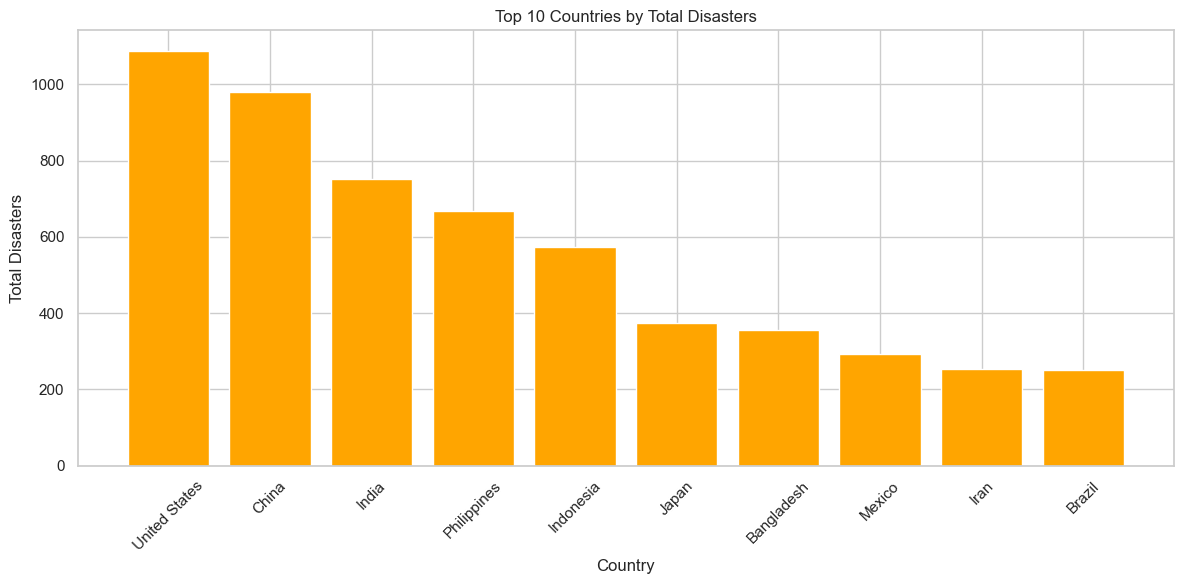

In [16]:
# Bar chart comparing Total Disasters by Top 10 Countries
disasters_by_country = disasters_by_country_df[['Country', 'Total_Disasters']].sort_values(by='Total_Disasters', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(disasters_by_country['Country'], disasters_by_country['Total_Disasters'], color='orange')
plt.title('Top 10 Countries by Total Disasters')
plt.xlabel('Country')
plt.ylabel('Total Disasters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart allows for easy comparison of **disaster frequency** across the top ten countries. The top ten Countries at the top of the chart likely experience a higher number of natural disasters, which could be linked to regional factors such as vulnerability to hurricanes, earthquakes, or flooding.

___

**Total Deaths by Country**
Similarly, I plotted a bar chart comparing **total deaths** by country to understand which regions have been most affected by the mortality caused by disasters.

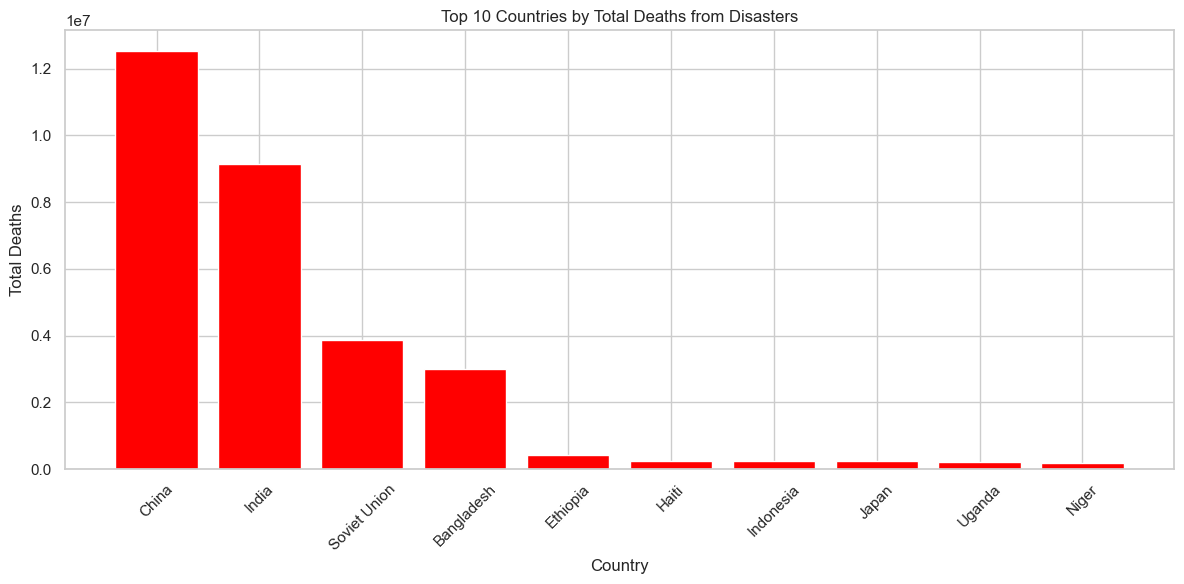

In [15]:
# Bar chart comparing Total Deaths by Top 10 Countries
deaths_by_country = disasters_by_country_df[['Country', 'Total_Deaths']].sort_values(by='Total_Deaths', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(deaths_by_country['Country'], deaths_by_country['Total_Deaths'], color='red')
plt.title('Top 10 Countries by Total Deaths from Disasters')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The **total deaths by country** bar chart helps us visualize the top ten countries that have experienced the most significant human losses due to disasters. This data can be used to assess the effectiveness of disaster preparedness and response efforts in different regions.

3. **Heatmaps for Showing Correlation or Disaster Frequency by Region**
Heatmaps are excellent for showing the correlation between variables or visualizing patterns across regions.

**Correlation Heatmap Between Temperature Anomalies, Total Disasters, and Total Deaths**
I used a heatmap to visualize the **correlation** between **annual mean temperature, total disasters**, and **total deaths**. The correlation values tell us how strongly these variables are related.

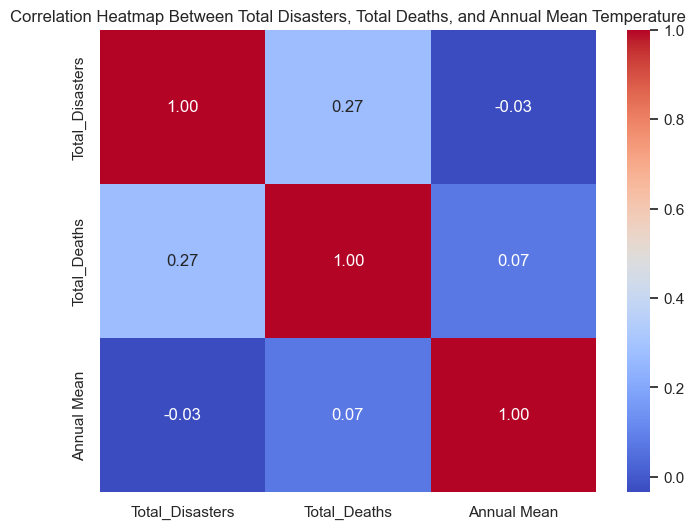

In [342]:
# Merge the relevant data into one DataFrame
correlation_data = disasters_by_country_df[['Country', 'Total_Disasters', 'Total_Deaths']]
correlation_data = correlation_data.merge(temperature_by_country_df[['Country', 'Annual Mean']], on='Country', how='left')

# Calculate the correlation matrix
correlation_matrix = correlation_data[['Total_Disasters', 'Total_Deaths', 'Annual Mean']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap Between Total Disasters, Total Deaths, and Annual Mean Temperature')
plt.show()

The **correlation heatmap** illustrates the relationships between **temperature anomalies, disasters**, and **deaths**. A high correlation between temperature anomalies and total disasters would suggest that warmer temperatures may contribute to more frequent disasters. Understanding these relationships can help in predicting future disaster occurrences and guide mitigation strategies.

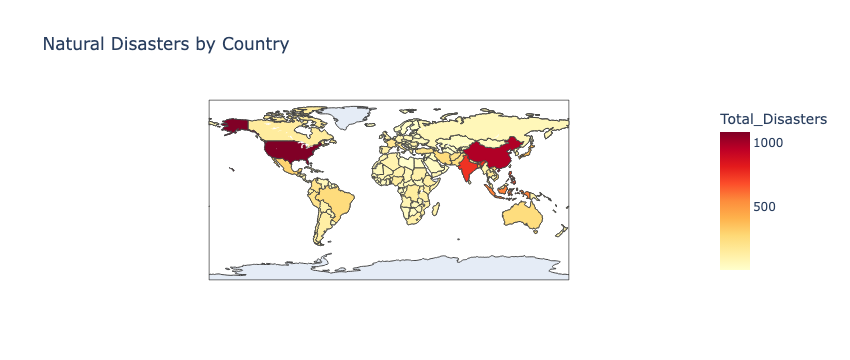

In [347]:
import plotly.express as px

# Aggregate disaster data by country
disasters_by_country = disasters_by_country_df.groupby('Country').agg({'Total_Disasters': 'sum'}).reset_index()

# Create an interactive choropleth map
fig = px.choropleth(disasters_by_country, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Total_Disasters',
                    hover_name='Country',
                    title='Natural Disasters by Country',
                    color_continuous_scale='YlOrRd')

fig.show()


This **interactive map** shows the **global distribution of disasters**. By hovering over a country, you can see the exact number of disasters in that country, which provides a clear picture of global disaster hotspots.

___
**Step 8: Summary of Insights**
In this section, I will summarize the key findings from the exploratory data analysis (EDA) and advanced analysis conducted throughout the project. The goal is to highlight the major insights, discuss potential correlations and causality, and provide recommendations for future research in understanding the relationship between **climate change** and **natural disasters**.

___

**Key Insights:**

1. **Increase in the Frequency of Natural Disasters:**

The analysis shows that the number of natural disasters has increased significantly over time, especially in the last few decades. The line plot of Total Disasters per Year reveals noticeable spikes in the 2000s, suggesting a growing trend of disaster occurrences.

This increase may be attributed to several factors, including better detection, improved reporting, population growth in disaster-prone regions, and potentially the impacts of climate change.


2. **Global Temperature Anomalies Show a Clear Upward Trend:**

The global temperature anomalies have been steadily rising since the mid-20th century, with a significant acceleration observed in recent decades. The line plot of global temperature anomalies demonstrates that global temperatures have increased by more than 1°C above pre-industrial levels, aligning with the scientific consensus on global warming.

This trend in temperature increase is likely tied to human activity, particularly the burning of fossil fuels, deforestation, and other activities that contribute to the accumulation of greenhouse gases in the atmosphere.


3. **Correlation Between Temperature Anomalies and Disasters:**

The correlation heatmap shows a positive correlation between temperature anomalies and both total disasters and total deaths. This suggests that rising temperatures might contribute to more frequent and severe natural disasters, as warmer climates can intensify the occurrence of extreme weather events (e.g., hurricanes, droughts, floods).

The regression analysis confirmed that there is a statistical relationship between annual mean temperature and total disasters, with an increase in temperature potentially leading to more frequent disasters. However, the p-value and R-squared value indicated that while the correlation is statistically significant, the R-squared value suggests that temperature is not the sole factor explaining the variability in disaster occurrences.


4. **Geographic Distribution of Disasters and Temperature Anomalies:**

The geographical maps created using Plotly revealed that certain regions, such as South East Asia, Central America, and parts of Africa, are disproportionately affected by natural disasters. These regions also show significant temperature anomalies, with warming temperatures correlating to higher disaster occurrences.

The interactive choropleth maps provided a visual understanding of how both disasters and temperature anomalies are distributed globally, highlighting areas where the effects of climate change are most pronounced.


5. **Outliers in Disaster Data:**

Outlier detection using the IQR method identified extreme events, such as years with exceptionally high numbers of disasters or deaths. These outliers likely correspond to catastrophic events such as tsunamis, major earthquakes, or large-scale hurricanes.

These extreme values underscore the importance of investigating large-scale events to understand the true impact of climate change on the most catastrophic disasters.

___

**Correlation vs. Causality:**
Correlation does not imply causality: Although the analysis reveals strong correlations between temperature anomalies and total disasters, we must be cautious when interpreting these relationships. While climate change may contribute to the increase in disaster frequency and severity, other factors, such as urbanization, population growth, deforestation, and government preparedness, can also influence disaster occurrences.

The observed correlation between temperature anomalies and disasters is significant, but it is important to note that temperature rise alone cannot explain the increase in natural disasters. Additional factors, such as global environmental policies, local socio-economic conditions, and geographical vulnerability, play a critical role in determining how disasters impact various regions.

___

**Suggestions for Future Research:**
1. **Longitudinal Analysis of Specific Disaster Types:**

Future research could focus on a longitudinal analysis of specific types of natural disasters (e.g., hurricanes, wildfires, floods) to determine whether the frequency and intensity of particular disaster types are more strongly correlated with temperature anomalies than others.
It would also be useful to analyze regional variations in disaster occurrence to account for regional vulnerabilities and adaptation measures.


2. **Incorporating Socio-Economic and Environmental Factors:**

To better understand the true drivers of natural disasters, future studies should integrate socio-economic factors (e.g., population density, economic development, urbanization) and environmental factors (e.g., land use, deforestation, agriculture) with temperature data.
Examining the human impact of disasters, including displacement, economic loss, and mortality rates, would help clarify the broader implications of climate change.


3. **Modeling Future Disaster Scenarios:**

Using climate models and disaster simulation models, future research could predict how climate change might influence disaster occurrence in the coming decades. By simulating various temperature rise scenarios and disaster mitigation strategies, these models can provide valuable insights into how future warming could affect global disaster patterns.
Such modeling can guide policy-makers and disaster response organizations in developing more targeted strategies for disaster risk reduction and climate adaptation.


4. **Global Disaster Preparedness and Policy Implications:**

Investigating how disaster preparedness and climate policy impact the frequency and severity of natural disasters would be another important area of research. Understanding how early warning systems, resilient infrastructure, and climate action policies influence the outcomes of climate-related disasters can help create better frameworks for mitigating the impacts of climate change.

___


**Additional Insights and Considerations:**
1. **Acknowledging the Complexity of Disaster Trends:**
While the analysis identifies a positive correlation between temperature anomalies and total disasters, it's crucial to acknowledge the complexity of disaster trends. Many other factors beyond climate change contribute to disaster occurrence, including:

    - **Geopolitical factors:** Conflict, political instability, and migration patterns can exacerbate disaster impacts and disrupt preparedness and response.
    - **Technological advancements:** Improvements in disaster detection, early warning systems, and communication networks might lead to better reporting, explaining part of the observed increase in disasters.
    - **Human vulnerability:** Socio-economic factors, such as poverty, population density, and urbanization, play a critical role in determining how disasters affect societies.

    In this context, the relationship between climate change and disasters is part of a larger system of interconnected factors that need to be understood holistically.

___

2. **Importance of Regional Climate Variability:**
While global temperature anomalies indicate a general warming trend, it's important to consider that climate change impacts are not uniform across the globe. Different regions experience climate change in unique ways:

    - **Polar regions** are warming faster than the equator, which may lead to different types of disaster impacts in these regions (e.g., rising sea levels, permafrost thawing).
    - **Coastal areas** may face more frequent flooding and hurricanes, while arid regions may suffer from increased droughts and wildfires.

    Future research could dive deeper into regional climate variability and localized disaster risks to create tailored mitigation and adaptation strategies for affected regions.

___

3. **Exploring Climate Change as a Driver of Severe Weather Events:**
In addition to temperature anomalies, extreme weather events (e.g., hurricanes, heatwaves, floods) driven by climate change could have more immediate impacts on disaster frequency. While temperature change contributes to the overall climate pattern, it is also critical to study:

How **sea surface temperatures** (SST) influence storm intensification and flooding.
The role of ocean circulation patterns (like El Niño and La Niña) in driving short-term changes in disaster occurrence.
This exploration will deepen our understanding of the climate-disaster nexus and help develop forecasting models that are region-specific and event-driven.

___

4. **Role of Disaster Preparedness and Mitigation Strategies:**
As the analysis shows a growing trend in disasters, it is equally important to emphasize the role of disaster preparedness and climate resilience in reducing the impact of these events. Countries with effective disaster management strategies, early warning systems, and resilient infrastructure may experience less loss of life and damage, despite experiencing more frequent disasters.

- **Developing nations**, which often lack adequate disaster preparedness, tend to be more vulnerable to both climate change and its disaster-related impacts.
Future research could explore how disaster risk reduction policies (e.g., climate adaptation plans, early warning systems, resilient infrastructure) can mitigate the impact of increasing disaster occurrences. Countries with stronger disaster resilience measures may show less significant increases in deaths and economic losses despite higher disaster frequency.

___

5. **Impact of Disaster Recovery on Socio-Economic Systems:**
The impact of natural disasters on human development and economic systems is profound. While this study focuses on disaster occurrences and deaths, further research could consider how disasters affect:

    - **Economic development:** Examining the cost of recovery, economic losses, and GDP growth post-disaster would reveal the broader socio-economic impacts.
    - **Migration:** Understanding how natural disasters lead to internal displacement or international migration would add another dimension to the study of disasters and climate change.
    - **Public health:** Disasters often have long-term public health consequences, including the spread of diseases, mental health crises, and disruptions to healthcare systems.

    Considering these impacts would provide a more comprehensive view of how natural disasters, driven by climate change, affect human societies beyond just the immediate consequences.

___

6. **Suggestions for Policy and Global Action:**
Given the clear evidence of the link between climate change and the increase in natural disasters, it is critical to call for more policy intervention at both the global and national levels:

    - **Climate Mitigation:** Countries need to take urgent action to reduce greenhouse gas emissions to slow down global warming. The Paris Agreement and other international climate frameworks should continue to drive collective global action.
    - **Disaster Risk Reduction (DRR):** Governments must integrate climate change adaptation strategies into national disaster risk management plans, especially for the most vulnerable countries and regions.
    - **Climate Justice:** Special attention should be paid to vulnerable communities that are disproportionately affected by disasters and climate change, often having the least resources to adapt.

    Future studies should not only focus on understanding the problem but also recommend solutions and mitigation measures that are equitable, sustainable, and actionable.

___

**Conclusion:**
This analysis provides strong evidence that climate change, as reflected in temperature anomalies, is associated with an increasing frequency of natural disasters. However, the relationship is complex and influenced by many factors, including socio-economic conditions, geographical vulnerability, and disaster preparedness.

The insights gained from this study underscore the importance of integrating climate change mitigation and disaster resilience strategies to reduce the impact of natural disasters in the future. While correlation between temperature anomalies and disasters is evident, further research should continue to investigate the causal links and explore how climate change mitigation can reduce the frequency and impact of disasters.

In conclusion, addressing the twin challenges of climate change and natural disasters requires global collaboration, proactive disaster management, and continued research to understand and mitigate the impacts of climate-induced risks.


___

**Final Thoughts:**
This analysis has demonstrated that there is a statistical relationship between climate change (as measured by temperature anomalies) and the occurrence of natural disasters. The increasing frequency of disasters, particularly in the 2000s, aligns with rising global temperatures. However, while the correlation is significant, it is important to understand that temperature anomalies alone do not fully explain the rising disaster tolls.

As the global temperature continues to rise, it is crucial for governments, policy-makers, and communities to focus on disaster preparedness, climate adaptation, and sustainable development to mitigate the impacts of future natural disasters. Future research can build on this work by incorporating more complex models and exploring additional factors that contribute to the increasing frequency and severity of disasters.